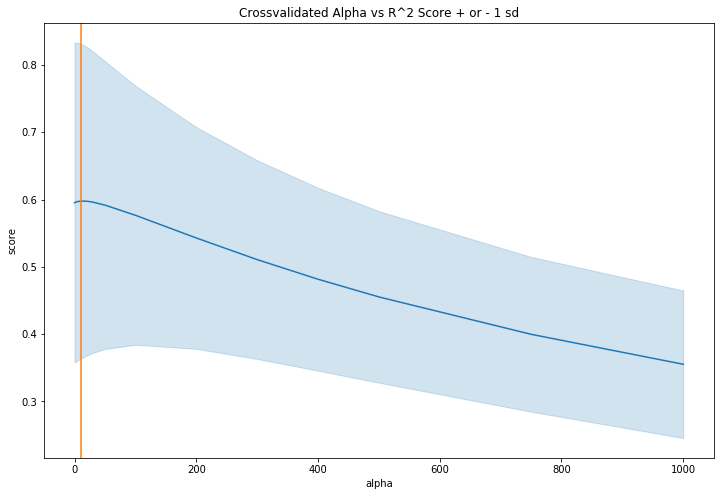

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df_boston = pd.read_csv("boston_train.csv")

X = df_boston.drop(columns = ['MEDV'],axis = 1)
y = df_boston['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

alphas = []
scores = []

#  α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of 
# coefficients.
_alpha = [0, 1e-6, 1e-4, 1e-2,.1, 1, 5, 10, 20, 30, 50, 100,200,300,400,500,750, 1000]

for i in _alpha:
    
    pipe = Pipeline([
                 ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha= i))
            ])
    score = cross_val_score(pipe, X_train, y_train, cv = 10)
    
    for x in score:
        scores.append(x)
        alphas.append(i)
ridge_frame = pd.DataFrame({'alpha': alphas, 'score': scores})

top_alpha = ((ridge_frame.groupby('alpha', as_index=False).mean().sort_values('score')))
top_alpha = top_alpha.iloc[-1:, 0].values

plt.figure(figsize = (12, 8))
sns.lineplot('alpha', 'score', data = ridge_frame, ci = "sd")
plt.title('Crossvalidated Alpha vs R^2 Score + or - 1 sd')
plt.axvline(top_alpha, color = "C1")
plt.savefig('ModelValidationPlot.png')